# CCE3206 - Practical 3 - Frequency response of an FIR filter
**Graham Pellegrini 0352804L**

## Tasks:

### 1. Create FIR filter


To define the filter function, we first define the filter coefficients h_n as a numpy array outside of the function. Then inside the function, we define the filter function that takes an input signal x as an argument. We initialize an output signal y with the same length and type as the input signal x. We also initialize a buffer x_nmi with zeros to store the previous input samples. We then iterate over all input samples, shifting the input samples into the buffer and adding the new input sample to the buffer. We calculate the output sample by multiplying the filter coefficients with the buffer samples and summing them up. Finally, we return the output samples.

In [217]:
import numpy as np

# Define the filter coefficients
h_n = np.array([-0.0147, 0.173, 0.342, 0.342, 0.173, -0.0147])

# Define the FIR filter function
def filter(x,h):
    # set y to have the same length and type as x
    y = np.zeros_like(x)
    # Set the buffer to zeros for the previous input samples
    x_nmi = np.zeros(6)

    # iterate over all input samples
    for n, x_n in enumerate(x):
        # shift the input samples into the buffer
        x_nmi[1:] = x_nmi[:-1]
        # add the new input sample to the buffer
        x_nmi[0] = x_n

        # calculate the output sample by multiplying respective filter coefficients with the buffer samples
        y[n] = np.sum(h * x_nmi)
    
    # return the output samples
    return y

### 2. Plotting output of delta input

Creating an input of 30 samples with first sample as 1 to simulate a delta function. The expected output should be the impulse response of the filter.
Which is a signal with values of the filter coefficients at the respective positions.


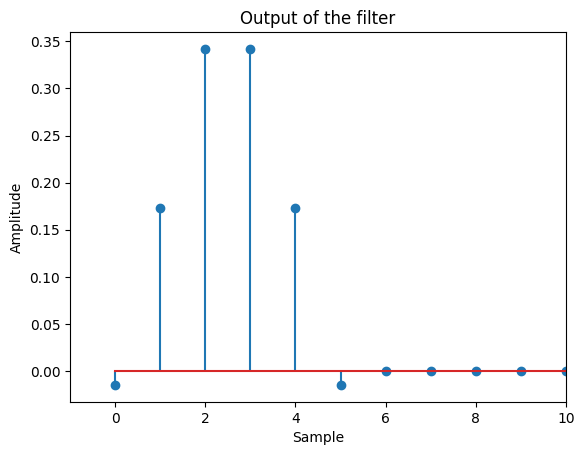

In [218]:
import matplotlib.pyplot as plt

# Setting a length of 30 samples for the input sequence
x = np.zeros(30)
# First sample to 1 for delta function
x[0] = 1

# Filter the input sequence
y = filter(x,h_n)

# Save the output for comparison
y_noninv = y

# Plot the stem plot for the output
plt.stem(y)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Output of the filter')
plt.xlim(-1, 10)
plt.show()



### 3. Confirming Output stem plot

Clearly, the output of the delta function gives the exact same values as the filter coefficients.

In [219]:
print (h_n)
print (y[:6])


[-0.0147  0.173   0.342   0.342   0.173  -0.0147]
[-0.0147  0.173   0.342   0.342   0.173  -0.0147]


### 4. Magnitude and Phase response


From the magnitude plot, we can see that the filter seems to be a low-pass as its max value 1 is at 0 rad/s and the values decrease as the absolute frequency increases. We also note the bounce back when the value reaches close to the x-axis, but doesnt cross it. This is due to the symmetry of the filter coefficients.

This symmetry is confimed by the phase plot, where we see that the phase is linear and increasing with frequency. This is a characteristic of a linear phase filter. With drops or jumps in the phases at the null points of the magnitude plot, we can confirm that the filter is a linear phase filter.

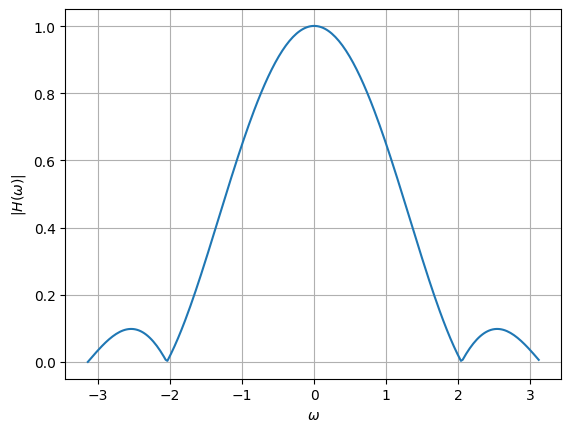

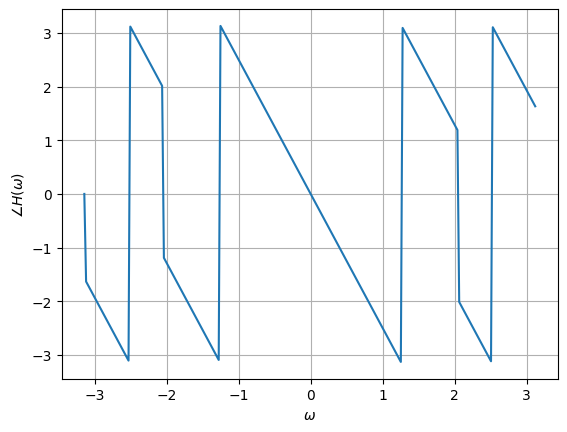

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift


# use a 256-point DFT
H = fft(h_n, 256)
# frequencies 𝜔 corresponding to the output of fft
w = fftfreq(256) * 2 * np.pi
# shift so that 𝜔 = 0 is at the center
H = fftshift(H)
w = fftshift(w)

# plot |𝐻(𝜔)| using np.abs(H)
fig, ax = plt.subplots()
ax.plot(w, abs(H))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$|H(\\omega)|$')
ax.grid(True)
plt.show()

#similarly plot ∢𝐻(𝜔) using np.angle(H)
fig, ax = plt.subplots()
ax.plot(w, np.angle(H))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$\\angle H(\\omega)$')
ax.grid(True)
plt.show()
# linear phase


### 5.

#### (a) Determine the type of filter implemented (whether it is low pass, high pass, or something else).

The filter implemented is a **low pass filter**. This can be identified from the magnitude plot: the filter starts with a high magnitude of 1 for the lower frequencies and then decreases to 0 for the higher frequencies. This behavior is characteristic of a low pass filter.

---

#### (b) Determine the filter’s cut-off frequency, known as the 3 dB point.

The 3 dB point is the frequency at which the power $(|H(\omega)|^2)$ is attenuated by 3 dB. This corresponds to the power being reduced by a factor of $(10^{3/10} = 2)$, which requires $(|H(\omega)|)$ to equal $(\sqrt{1/2} \approx 0.7071)$.

We find the 3 dB point by identifying the points where the magnitude of $(H(\omega))$ is approximately $0.7071\%$ of its maximum . The indices and corresponding cut-off frequencies are:

**Cut-off frequencies:**  
- $(-0.90811663)$  
- $(0.90811663)$

These are the naturally the same frequencies but in opposite directions due to the curves characteristic.

---

#### (c) Determine the frequency of any null points.

Null points are frequencies where $(H(\omega) = 0)$ (or approximately zero). These points indicate where the filter completely attenuates the signal. 

To find the null points, we locate the indices where the magnitude of $(H(\omega))$ is closest to zero. Note that the magnitude does not exactly reach zero but approaches it closely. The indices and corresponding frequencies for the null points are:

**Null points:**  
- $(-\pi)$ and $(\pi)$ (same point)  
- $(-2.0371)$  
- $(2.0371)$

The null points are symmetric around the origin, with equal magnitude in positive and negative directions.

---

#### (d) Comment on the phase response.

The phase response of the filter is **linear**. It continuously decreases from $(0)$ to $(-\pi)$ and then spikes upward back to $(+\pi)$. The spikes occur at the null points, representing phase discontinuities. Except for these spikes, the phase response exhibits a consistent, linear slope.


In [221]:

# (b)
# Get the 3 dB cut off value, 0.7071% of H max value
cut_offs = (max(H) * 0.7071) 
# Find the indices of the 3 dB cut off value
cut_offs = np.isclose(abs(H), cut_offs, atol=0.01)
# Get the frequencies at the 3 dB cut off value
cut_off_freqs = w[cut_offs]
print("The 3 dB cut off frequencies are at", cut_off_freqs)

# (c) 

# Get H(𝜔) closest to zero 
nulls = np.where(abs(H) < 0.006)

print ("Respective null frequencies", w[nulls])

The 3 dB cut off frequencies are at [-0.90811663  0.90811663]
Respective null frequencies [-3.14159265 -2.03712649  2.03712649]


### 6. Mathematical Analysis

#### (a) Evaluate the Fourier transform of $h(n)$ given by 

$$
H(\omega) = \sum_{n=-\infty}^{\infty} h(n) e^{-j\omega n}
$$

where $h(n)$ is the same as in Task 1. Expand the summation, such that $H(\omega)$ is expressed as a sum of six terms of the form  $c e^{-j\omega n}$.

From $h(n)$ in Task 1:

$$
h(0) = -0.0147, \quad h(1) = 0.173, \quad h(2) = 0.342, \quad h(3) = 0.342, \quad h(4) = 0.173, \quad h(5) = -0.0147
$$

Therefore:

$$
H(\omega) = -0.0147 e^{0} + 0.173 e^{-j\omega} + 0.342 e^{-j2\omega} + 0.342 e^{-j3\omega} + 0.173 e^{-j4\omega} - 0.0147 e^{-j5\omega}
$$
---

##### (b) Group the terms in pairs that have equal coefficients:

$$
H(\omega) = (-0.0147)(e^{-j0\omega} - e^{-j5\omega}) + (0.173)(e^{-j1\omega} + e^{-j4\omega}) + (0.342)(e^{-j2\omega} + e^{-j3\omega})
$$
---

#### (c) Apply this to all the pairs with equal coefficients:
$$
\left( e^{-j\omega l} + e^{-j\omega m} \right) = c e^{-j\omega \frac{(l+m)}{2}} \left( e^{-j\omega \frac{(l-m)}{2}} + e^{-j\omega \frac{(m-l)}{2}} \right) = 2c e^{-j\omega \frac{(l+m)}{2}} \cos \left( \omega \frac{(l - m)}{2} \right)
$$



$$
H(\omega) = 2(-0.0147)e^{-j2.5\omega} \cos(2.5\omega) + 2(0.173)e^{-j2.5\omega} \cos(1.5\omega) + 2(0.342)e^{-j2.5\omega} \cos(0.5\omega)
$$

$$
H(\omega) = -0.0294 e^{-j2.5\omega} \cos(2.5\omega) + 0.346 e^{-j2.5\omega} \cos(1.5\omega) + 0.684 e^{-j2.5\omega} \cos(0.5\omega)
$$
---

#### (d) Rewrite the whole expression such that $ H(\omega)$ is expressed in the form:

$$
H(\omega) = a(\omega)e^{-j b(\omega)}
$$

where $a(\omega)$ and $b(\omega)$ are both real functions.

$$
H(\omega) = e^{-j 2.5\omega} * [-0.0294 \cos(2.5\omega) + 0.346 \cos(1.5\omega) + 0.684 \cos(0.5\omega)]
$$

Therefore:

$$
a(\omega) = -0.0294 \cos(2.5\omega) + 0.346 \cos(1.5\omega) + 0.684 \cos(0.5\omega)
$$

$$
b(\omega) = 2.5\omega
$$


### 7. 


The plots are identical to those of task 4, therefore confirming our mathematical derivation of H(𝜔) and the characteristics of the FIR Filter defined

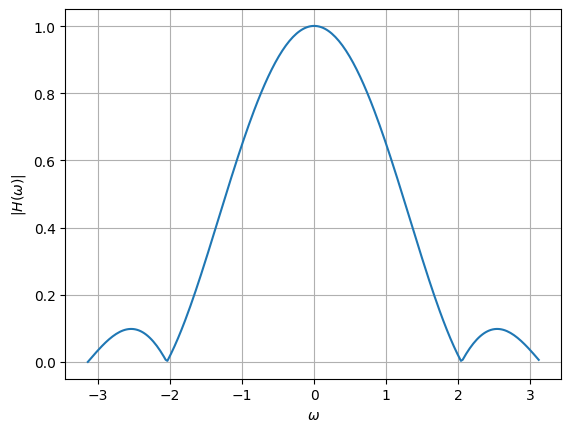

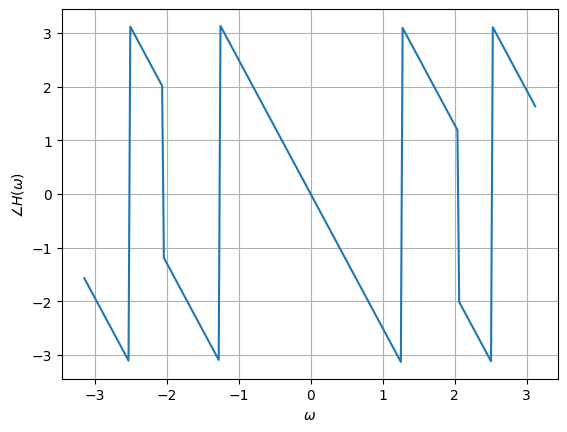

In [222]:
# Define a_w from the mathematical derivation
a_w = -0.0294 * np.cos(2.5*w) + 0.346 * np.cos(1.5*w) + 0.684 * np.cos(0.5*w)
# Define b_w from the mathematical derivation
b_w = 2.5 * w

# Use these derivations to calculate H(𝜔)
H = a_w * np.exp(-1j * b_w)

# Plot the magnitude of H(𝜔)
fig, ax = plt.subplots()
ax.plot(w, abs(H))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$|H(\\omega)|$')
ax.grid(True)
plt.show()

# Plot the phase of H(𝜔)
fig, ax = plt.subplots()
ax.plot(w, np.angle(H))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$\\angle H(\\omega)$')
ax.grid(True)
plt.show()

### 8.
The smallest null point identified is at w = pi. The output of the filter at this frequency is a sequence of zeros. We can see a transient response at the beginning of the output sequence, which is due to the filter's impulse response. This then settles to a sequence of zeros, which is expected as the input sequence is a cosine wave at the null frequency.

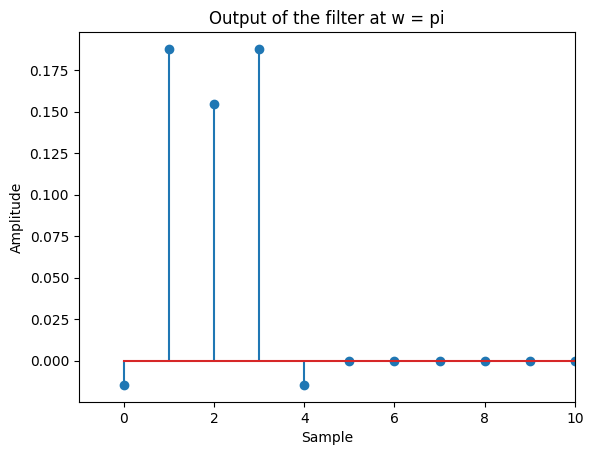

In [223]:

# Define the frequency of the smallest null point from part 5c
w_pi = np.pi
# w_pi is the frequency of the null point
x = np.cos(np.arange(32) * w_pi)

# Filter the input sequence
y = filter(x,h_n)

# Plot the response using a stem plot and comment on the observed output.
plt.stem(y)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Output of the filter at w = pi')
plt.xlim(-1, 10)
plt.show()

### 9.


By multiplying the filter coefficients by -1 at every other index, the filter coefficients are spectrally inverted. This essentially means that we move from a low-pass filter to a high-pass filter. 

#### (a) Determine the type of filter implemented (whether it is low pass, high pass, or something else).

Due to the spectral inversion, the filter changes from a low-pass filter to a high-pass filter. The original filter was a low-pass filter, as evidenced by the gradual attenuation of higher frequencies. The spectral inversion flips the filter's response, causing it to attenuate lower frequencies and pass higher frequencies.

---

#### (b) Determine the filter’s cut-off frequency, known as the 3 dB point.

The new cut-off frequency is moved to the high-frequency region due to the spectral inversion. 


**Cut-off frequencies:**  
- $(-2.23347603)$  
- $(0.2.23347603)$

---

#### (c) Determine the frequency of any null points.

The null points are now located at the lower frequencies due to the spectral inversion. Due to the shape of the magnitude response, we have null points at the following frequencies:

**Null frequencies:**
- $(0)$
- $(1.10446617)$
- $(-1.10446617)$

---

#### (d) Comment on the phase response.

 The phase response of the filter **did not remain linear** after spectral inversion. This is because the phase response jumps from postive to negative values of magnitude and their corresponding angles. Hence, the changes in polarity results in a non-linear phase response.


[-0.0147 -0.173   0.342  -0.342   0.173   0.0147]


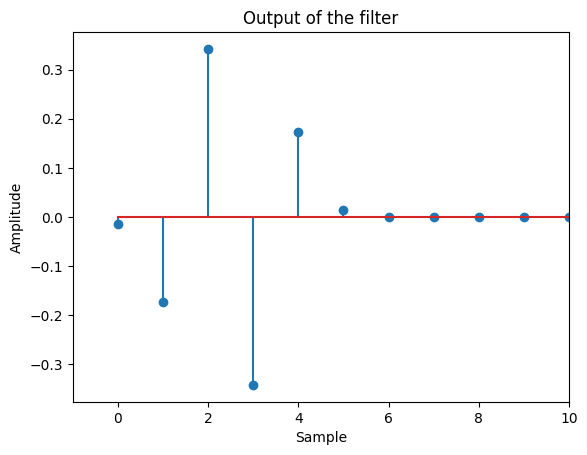

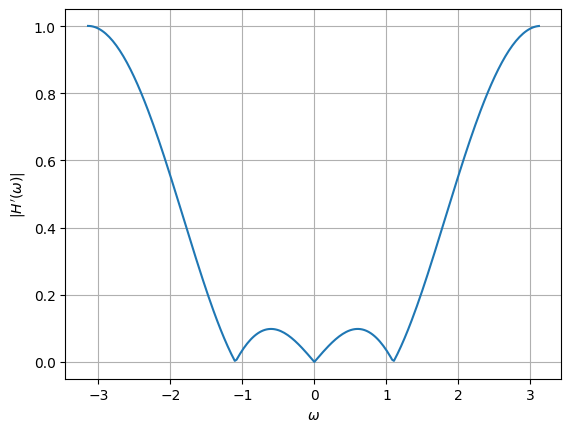

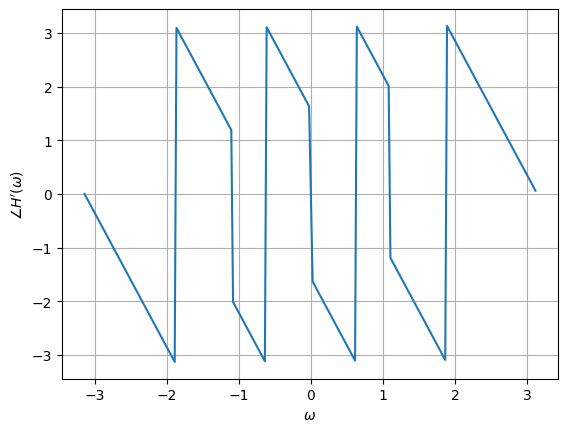

The 3 dB cut off frequencies are at [-2.23347603  2.23347603]
Respective null frequencies [-1.10446617  0.          1.10446617]


In [224]:
# Invert the sign of every other coefficient by multiplying by -1
h_spec_inv = h_n * np.array([1, -1, 1, -1, 1, -1])
# Confirm that the coefficient spectral inversion has been done correctly
print (h_spec_inv)

# Redefine the delta input sequence for x
x = np.zeros(30)
x[0] = 1

# Filter the input sequence with the new coefficients
y = filter(x,h_spec_inv)

# Plot the response using a stem plot and comment on the observed output.
plt.stem(y)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Output of the filter')
plt.xlim(-1, 10)
plt.show()


# Recalculate the frequency response of the filter using the new coefficients
H_spec_inv = fft(h_spec_inv, 256)
w = fftfreq(256) * 2 * np.pi
H_spec_inv = fftshift(H_spec_inv)
w = fftshift(w)

# plot |𝐻'(w)| using the absolute value 
fig, ax = plt.subplots()
ax.plot(w, abs(H_spec_inv))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$|H\'(\\omega)|$')
ax.grid(True)
plt.show()

# plot ∢𝐻'(𝜔) using the numpy angular function 
fig, ax = plt.subplots()
ax.plot(w, np.angle(H_spec_inv))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$\\angle H\'(\\omega)$')
ax.grid(True)
plt.show()

# Get the 3 dB  cut off value
cut_offs = (max(H_spec_inv) * 0.7071) 
# Find the indices of the 3 dB cut off value
cut_offs = np.isclose(abs(H_spec_inv), cut_offs, atol=0.01)
# Get the frequencies at the 3 dB cut off value
cut_off_freqs = w[cut_offs]
print("The 3 dB cut off frequencies are at", cut_off_freqs)

# Get H(𝜔) closest to zero
nulls = np.where(abs(H_spec_inv) < 0.006)
print ("Respective null frequencies", w[nulls])

### 10.

The impulse response for both the original and spectrally inverted coefficients are plotted on the same graph. This allows us to see the output variance between the two sets. Spectral inversion has inverted the sign of every other coefficient.

It was evident that the original coefficients produced a low-pass filter, while the result of the spectral inversion produced a high-pass filter. This resulted in them having different 3 dB cut-off frequencies and null frequencies. It can be noted that the 3 dB points were respective of the type of filter they were. That is, the original filter (low-pass) had lower 3 dB cut-off frequencies than the spectrally inverted filter (high-pass). They both followed the same general shape of the filter, but the spectral inversion produced a filter that was the inverse of the original filter.

The phase response of the filters was also different. The original filter had a linear phase, while the spectrally inverted filter had a non-linear phase. This non-linearity was due to the inversion of the sign of every other coefficient, causing the phase to jump between positive and negative values, in contrast to the linear phase of the original filter.

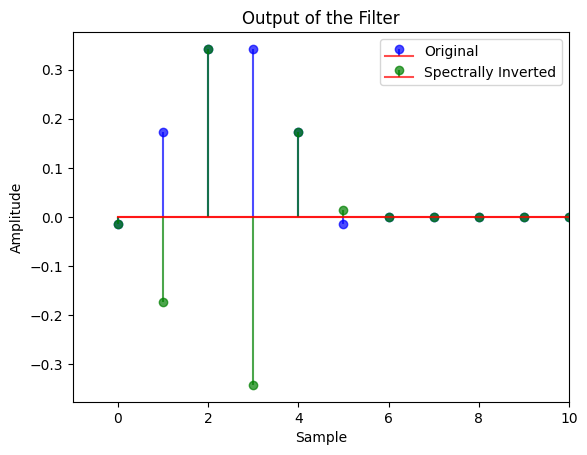

In [225]:
# Get the two different outputs for the two sets of coefficients
y = filter(x,h_n)
y_spec_inv = filter(x,h_spec_inv)

# Function to plot stem with reduced opacity
def plot_stem_with_alpha(data, label, linefmt, markerfmt, alpha=0.7):
    markerline, stemlines, baseline = plt.stem(data, label=label, linefmt=linefmt, markerfmt=markerfmt, basefmt='r-')
    plt.setp(markerline, 'alpha', alpha)
    plt.setp(stemlines, 'alpha', alpha)
    plt.setp(baseline, 'alpha', alpha)

# Plot both the original and spectrally inverted impulse responses with reduced opacity
plot_stem_with_alpha(y, 'Original', 'b-', 'bo')
plot_stem_with_alpha(y_spec_inv, 'Spectrally Inverted', 'g-', 'go')

plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Output of the Filter')
plt.xlim(-1, 10)
plt.legend()
plt.show()